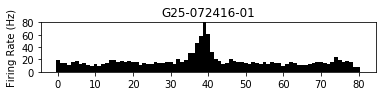

In [3]:
import pickle
from BYBLoadGrasshopperData import *
from BYBSpikes import *
import matplotlib.pyplot as plt
import numpy as np

db = open('2016 Nguyen et al - Grasshopper DCMD', 'r')
x = db.read()
l = pickle.loads(eval(x))

g = l.select('session', "G25-072416-01")

s = plotPETH(g[0], 'impactS06', binSize = .05, timerange = [-2,2], ylim = 80)
plt.savefig('figure 7: ' + g[0].session)

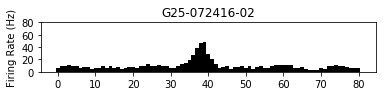

In [4]:
g = l.select('session', "G25-072416-02")

s = plotPETH(g[0], 'impactS06', binSize = .05, timerange = [-2,2], ylim = 80)
plt.savefig('figure 7: ' + g[0].session)

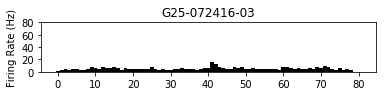

In [5]:
g = l.select('session', "G25-072416-03")

s = plotPETH(g[0], 'impactS06', binSize = .05, timerange = [-2,2], ylim = 80)
plt.savefig('figure 7: ' + g[0].session)

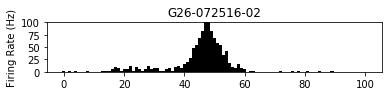

In [8]:
g = l.select('session', "G26-072516-02")

s = plotPETH(g[0], 'impactS06V02', binSize = .02, ylim = 100)
plt.savefig('figure 8: ' + g[0].session)

([<matplotlib.axis.XTick at 0x113d17ba8>,
 <a list of 5 Text xticklabel objects>)

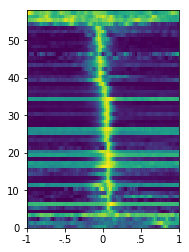

In [18]:
xarr = np.array([])
yarr = np.array([])
for y in range(len(l)):
    for x in plotPETH(l[y], 'impact', makeplot = 0):
        xarr = np.append(xarr, x) 
        yarr = np.append(yarr, ([y] * len(x)))
        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
h, *throughaway = plt.hist2d(xarr,yarr,bins=[100,58])

h = np.transpose(h)

d2 = []
for i in h:
    d2.append((i/i.max()).tolist())
    

d2.sort(key = lambda x: x.index(1), reverse = True)

for i in range(len(d2)):
    d2[i] = smooth(d2[i], 3)

plt.close()
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.pcolormesh(d2)
plt.xticks([0,24.5,49,73.5,98], ['-1','-.5','0','.5','1'])